In [1]:
import warnings

warnings.filterwarnings(action='ignore')

import torch
import matplotlib.pyplot as plt

from torch.optim import AdamW
from torch.optim.lr_scheduler import ReduceLROnPlateau, OneCycleLR
from torch import nn
from torch.utils.data import random_split, DataLoader
from forest_cover_change_detection.dataloaders.change import ChangeDetectionDataset
from forest_cover_change_detection.models.fc_ef import FCFE
from forest_cover_change_detection.trainer.train import Compile
from forest_cover_change_detection.metrics.accuracy import *

ModuleNotFoundError: No module named 'forest_cover_change_detection'

### Loading Data

In [2]:
data_set = ChangeDetectionDataset('../data/annotated',
                                  '../data/train.csv',
                                  concat=True,
                                  patched=False
                                  )

In [3]:
len(data_set)

334

torch.Size([6, 128, 128]) torch.Size([128, 128])


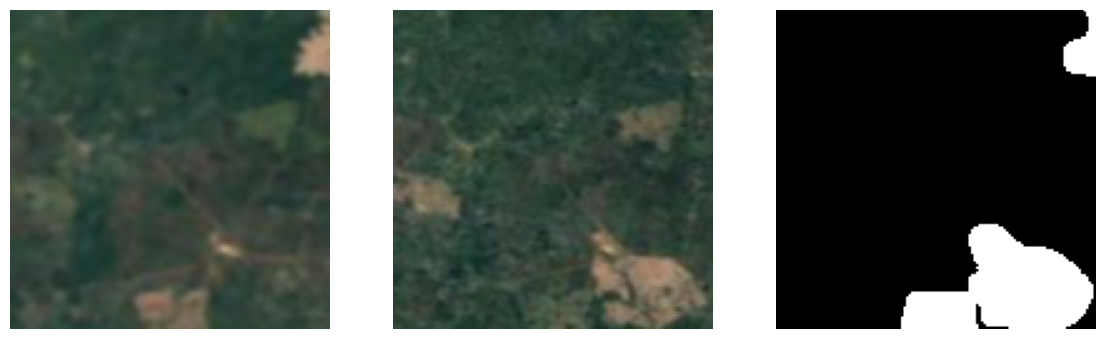

In [11]:
img, label = data_set[np.random.randint(0, data_set.__len__())]
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(14, 8), dpi=100)
axes = axes.ravel()

axes[0].imshow(img[:3, ::].permute(1, 2, 0).numpy())
axes[1].imshow(img[3:, ::].permute(1, 2, 0).numpy())
axes[2].imshow(label.numpy(), cmap='gray')

axes[0].axis(False)
axes[1].axis(False)
axes[2].axis(False)

print(img.shape, label.shape)

In [12]:
train_size = int(len(data_set) * 0.8)
test_size = len(data_set) - train_size

train_dataset, test_dataset = random_split(data_set, (train_size, test_size))

train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=True)

len(train_dataloader), len(test_dataloader)

(9, 3)

### Modeling

In [13]:
model = FCFE(6, 3, classes=2)

In [14]:
optimizer = AdamW(model.parameters(), lr=0.001)
scheduler = ReduceLROnPlateau(optimizer, factor=0.1, cooldown=10)
# scheduler = OneCycleLR(optimizer, max_lr=0.01, steps_per_epoch=len(train_dataloader), epochs=50)

compiled = Compile(model,
                   optimizer,
                   lr_scheduler=scheduler
                   )

In [8]:
compiled.summary((6, 128, 128))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 16, 128, 128]             880
       BatchNorm2d-2         [-1, 16, 128, 128]              32
           Dropout-3         [-1, 16, 128, 128]               0
            Conv2d-4         [-1, 16, 128, 128]           2,320
       BatchNorm2d-5         [-1, 16, 128, 128]              32
           Dropout-6         [-1, 16, 128, 128]               0
         MaxPool2d-7           [-1, 16, 64, 64]               0
            Conv2d-8           [-1, 32, 64, 64]           4,640
       BatchNorm2d-9           [-1, 32, 64, 64]              64
          Dropout-10           [-1, 32, 64, 64]               0
           Conv2d-11           [-1, 32, 64, 64]           9,248
      BatchNorm2d-12           [-1, 32, 64, 64]              64
          Dropout-13           [-1, 32, 64, 64]               0
        MaxPool2d-14           [-1, 32,

In [15]:
w = torch.load('../data/class_weight.pt')
w

tensor([0.0962, 1.9038], device='cuda:0')

In [16]:
results = compiled.train(train_dataloader,
                         nn.NLLLoss(w),
                         150,
                         test_dataloader)

Epoch:   0%|          | 0/150 [00:00<?, ?it/s]

Training:   0%|          | 0/9 [00:00<?, ?it/s]

train loss: 1.0027475357055664


Validation:   0%|          | 0/3 [00:00<?, ?it/s]

val loss: 0.6790353457132975


Training:   0%|          | 0/9 [00:00<?, ?it/s]

train loss: 0.8498816821310256


Validation:   0%|          | 0/3 [00:00<?, ?it/s]

val loss: 0.707201619942983


Training:   0%|          | 0/9 [00:00<?, ?it/s]

train loss: 0.784239285522037


Validation:   0%|          | 0/3 [00:00<?, ?it/s]

val loss: 0.9930028120676676


Training:   0%|          | 0/9 [00:00<?, ?it/s]

train loss: 0.7929564780659146


Validation:   0%|          | 0/3 [00:00<?, ?it/s]

val loss: 0.6908335387706757


Training:   0%|          | 0/9 [00:00<?, ?it/s]

train loss: 0.7572667466269599


Validation:   0%|          | 0/3 [00:00<?, ?it/s]

val loss: 1.9974730809529622


Training:   0%|          | 0/9 [00:00<?, ?it/s]

train loss: 0.7946126461029053


Validation:   0%|          | 0/3 [00:00<?, ?it/s]

val loss: 1.4330049753189087


Training:   0%|          | 0/9 [00:00<?, ?it/s]

train loss: 0.7374305990007188


Validation:   0%|          | 0/3 [00:00<?, ?it/s]

val loss: 0.8986184994379679


Training:   0%|          | 0/9 [00:00<?, ?it/s]

train loss: 0.748232344786326


Validation:   0%|          | 0/3 [00:00<?, ?it/s]

val loss: 0.6978945732116699


Training:   0%|          | 0/9 [00:00<?, ?it/s]

train loss: 0.7594417333602905


Validation:   0%|          | 0/3 [00:00<?, ?it/s]

val loss: 0.6551816662152609


Training:   0%|          | 0/9 [00:00<?, ?it/s]

train loss: 0.7489190234078301


Validation:   0%|          | 0/3 [00:00<?, ?it/s]

val loss: 0.7249924739201864


Training:   0%|          | 0/9 [00:00<?, ?it/s]

train loss: 0.7303374608357748


Validation:   0%|          | 0/3 [00:00<?, ?it/s]

val loss: 0.7001107335090637


Training:   0%|          | 0/9 [00:00<?, ?it/s]

train loss: 0.6803924938042959


Validation:   0%|          | 0/3 [00:00<?, ?it/s]

val loss: 0.8581141432126363


Training:   0%|          | 0/9 [00:00<?, ?it/s]

train loss: 0.7181192636489868


Validation:   0%|          | 0/3 [00:00<?, ?it/s]

val loss: 0.9462954600652059


Training:   0%|          | 0/9 [00:00<?, ?it/s]

train loss: 0.6944151322046915


Validation:   0%|          | 0/3 [00:00<?, ?it/s]

val loss: 0.6370263199011484


Training:   0%|          | 0/9 [00:00<?, ?it/s]

train loss: 0.713912844657898


Validation:   0%|          | 0/3 [00:00<?, ?it/s]

val loss: 0.6321518222490946


Training:   0%|          | 0/9 [00:00<?, ?it/s]

train loss: 0.7115879853566488


Validation:   0%|          | 0/3 [00:00<?, ?it/s]

val loss: 0.7822844584782919


Training:   0%|          | 0/9 [00:00<?, ?it/s]

train loss: 0.6902487277984619


Validation:   0%|          | 0/3 [00:00<?, ?it/s]

val loss: 0.8848573764165243


Training:   0%|          | 0/9 [00:00<?, ?it/s]

train loss: 0.7204201817512512


Validation:   0%|          | 0/3 [00:00<?, ?it/s]

val loss: 0.9593308766682943


Training:   0%|          | 0/9 [00:00<?, ?it/s]

train loss: 0.7002104388342963


Validation:   0%|          | 0/3 [00:00<?, ?it/s]

val loss: 1.0356523791948955


Training:   0%|          | 0/9 [00:00<?, ?it/s]

train loss: 0.7228575613763597


Validation:   0%|          | 0/3 [00:00<?, ?it/s]

val loss: 0.6510841449101766


Training:   0%|          | 0/9 [00:00<?, ?it/s]

train loss: 0.6622079114119211


Validation:   0%|          | 0/3 [00:00<?, ?it/s]

val loss: 0.7208108703295389


Training:   0%|          | 0/9 [00:00<?, ?it/s]

train loss: 0.6959854695532057


Validation:   0%|          | 0/3 [00:00<?, ?it/s]

val loss: 1.2661669651667278


Training:   0%|          | 0/9 [00:00<?, ?it/s]

train loss: 0.6989814970228407


Validation:   0%|          | 0/3 [00:00<?, ?it/s]

val loss: 0.7116462190945944


Training:   0%|          | 0/9 [00:00<?, ?it/s]

train loss: 0.6910748415523105


Validation:   0%|          | 0/3 [00:00<?, ?it/s]

val loss: 0.6101652582486471


Training:   0%|          | 0/9 [00:00<?, ?it/s]

train loss: 0.7356972826851739


Validation:   0%|          | 0/3 [00:00<?, ?it/s]

val loss: 0.9276805520057678


Training:   0%|          | 0/9 [00:00<?, ?it/s]

train loss: 0.6909337573581271


Validation:   0%|          | 0/3 [00:00<?, ?it/s]

val loss: 0.8574719528357188


Training:   0%|          | 0/9 [00:00<?, ?it/s]

train loss: 0.695857842763265


Validation:   0%|          | 0/3 [00:00<?, ?it/s]

val loss: 0.6921227971712748


Training:   0%|          | 0/9 [00:00<?, ?it/s]

train loss: 0.6793300840589735


Validation:   0%|          | 0/3 [00:00<?, ?it/s]

val loss: 0.893735925356547


Training:   0%|          | 0/9 [00:00<?, ?it/s]

train loss: 0.6950853930579292


Validation:   0%|          | 0/3 [00:00<?, ?it/s]

val loss: 0.6754231651624044


Training:   0%|          | 0/9 [00:00<?, ?it/s]

train loss: 0.6764149533377753


Validation:   0%|          | 0/3 [00:00<?, ?it/s]

val loss: 0.6785697142283121


Training:   0%|          | 0/9 [00:00<?, ?it/s]

train loss: 0.7029603984620836


Validation:   0%|          | 0/3 [00:00<?, ?it/s]

val loss: 0.7012883623441061


Training:   0%|          | 0/9 [00:00<?, ?it/s]

train loss: 0.6588549945089552


Validation:   0%|          | 0/3 [00:00<?, ?it/s]

val loss: 0.6268136302630106


Training:   0%|          | 0/9 [00:00<?, ?it/s]

train loss: 0.6565965811411539


Validation:   0%|          | 0/3 [00:00<?, ?it/s]

val loss: 1.0459503531455994


Training:   0%|          | 0/9 [00:00<?, ?it/s]

train loss: 0.6735794279310439


Validation:   0%|          | 0/3 [00:00<?, ?it/s]

val loss: 1.0827104846636455


Training:   0%|          | 0/9 [00:00<?, ?it/s]

train loss: 0.6783118512895372


Validation:   0%|          | 0/3 [00:00<?, ?it/s]

val loss: 0.7541783849398295


Training:   0%|          | 0/9 [00:00<?, ?it/s]

train loss: 0.6372771991623772


Validation:   0%|          | 0/3 [00:00<?, ?it/s]

val loss: 0.9391723473866781


Training:   0%|          | 0/9 [00:00<?, ?it/s]

train loss: 0.6513021058506436


Validation:   0%|          | 0/3 [00:00<?, ?it/s]

val loss: 0.9655840794245402


Training:   0%|          | 0/9 [00:00<?, ?it/s]

train loss: 0.688165545463562


Validation:   0%|          | 0/3 [00:00<?, ?it/s]

val loss: 0.6257671117782593


Training:   0%|          | 0/9 [00:00<?, ?it/s]

train loss: 0.6586241258515252


Validation:   0%|          | 0/3 [00:00<?, ?it/s]

val loss: 0.7744716008504232


Training:   0%|          | 0/9 [00:00<?, ?it/s]

train loss: 0.6771672434277005


Validation:   0%|          | 0/3 [00:00<?, ?it/s]

val loss: 1.2594415942827861


Training:   0%|          | 0/9 [00:00<?, ?it/s]

train loss: 0.6880363821983337


Validation:   0%|          | 0/3 [00:00<?, ?it/s]

val loss: 0.7925445238749186


Training:   0%|          | 0/9 [00:00<?, ?it/s]

train loss: 0.6461386415693495


Validation:   0%|          | 0/3 [00:00<?, ?it/s]

val loss: 0.8485670487085978


Training:   0%|          | 0/9 [00:00<?, ?it/s]

train loss: 0.6454439693027072


Validation:   0%|          | 0/3 [00:00<?, ?it/s]

val loss: 0.7587457696596781


Training:   0%|          | 0/9 [00:00<?, ?it/s]

train loss: 0.627951423327128


Validation:   0%|          | 0/3 [00:00<?, ?it/s]

val loss: 1.005272348721822


Training:   0%|          | 0/9 [00:00<?, ?it/s]

train loss: 0.6423217786682976


Validation:   0%|          | 0/3 [00:00<?, ?it/s]

val loss: 0.985385517279307


Training:   0%|          | 0/9 [00:00<?, ?it/s]

train loss: 0.6612916257646348


Validation:   0%|          | 0/3 [00:00<?, ?it/s]

val loss: 0.8090436259905497


Training:   0%|          | 0/9 [00:00<?, ?it/s]

train loss: 0.6766703393724229


Validation:   0%|          | 0/3 [00:00<?, ?it/s]

val loss: 0.9311116337776184


Training:   0%|          | 0/9 [00:00<?, ?it/s]

train loss: 0.6522417134708829


Validation:   0%|          | 0/3 [00:00<?, ?it/s]

val loss: 0.8864655296007792


Training:   0%|          | 0/9 [00:00<?, ?it/s]

train loss: 0.6389334996541342


Validation:   0%|          | 0/3 [00:00<?, ?it/s]

val loss: 0.8134392698605856


Training:   0%|          | 0/9 [00:00<?, ?it/s]

train loss: 0.6560235619544983


Validation:   0%|          | 0/3 [00:00<?, ?it/s]

val loss: 0.7540953755378723


Training:   0%|          | 0/9 [00:00<?, ?it/s]

train loss: 0.7126595709058974


Validation:   0%|          | 0/3 [00:00<?, ?it/s]

val loss: 0.8986873428026835


Training:   0%|          | 0/9 [00:00<?, ?it/s]

train loss: 0.638292305999332


Validation:   0%|          | 0/3 [00:00<?, ?it/s]

val loss: 0.7971928318341573


Training:   0%|          | 0/9 [00:00<?, ?it/s]

train loss: 0.6447752581702338


Validation:   0%|          | 0/3 [00:00<?, ?it/s]

val loss: 0.8429585695266724


Training:   0%|          | 0/9 [00:00<?, ?it/s]

train loss: 0.6401370300187005


Validation:   0%|          | 0/3 [00:00<?, ?it/s]

val loss: 0.6268904805183411


Training:   0%|          | 0/9 [00:00<?, ?it/s]

train loss: 0.6521986524264017


Validation:   0%|          | 0/3 [00:00<?, ?it/s]

val loss: 0.7900135715802511


Training:   0%|          | 0/9 [00:00<?, ?it/s]

train loss: 0.6666127310858833


Validation:   0%|          | 0/3 [00:00<?, ?it/s]

val loss: 0.8231614033381144


Training:   0%|          | 0/9 [00:00<?, ?it/s]

train loss: 0.6199520230293274


Validation:   0%|          | 0/3 [00:00<?, ?it/s]

val loss: 0.7408653895060221


Training:   0%|          | 0/9 [00:00<?, ?it/s]

train loss: 0.6787867347399393


Validation:   0%|          | 0/3 [00:00<?, ?it/s]

val loss: 0.7903189063072205


Training:   0%|          | 0/9 [00:00<?, ?it/s]

train loss: 0.6266022788153754


Validation:   0%|          | 0/3 [00:00<?, ?it/s]

val loss: 0.7977107266585032


Training:   0%|          | 0/9 [00:00<?, ?it/s]

train loss: 0.6556487282117208


Validation:   0%|          | 0/3 [00:00<?, ?it/s]

val loss: 0.7306421399116516


Training:   0%|          | 0/9 [00:00<?, ?it/s]

train loss: 0.6566661596298218


Validation:   0%|          | 0/3 [00:00<?, ?it/s]

val loss: 0.8882460196812948


Training:   0%|          | 0/9 [00:00<?, ?it/s]

train loss: 0.6556410060988532


Validation:   0%|          | 0/3 [00:00<?, ?it/s]

val loss: 0.8209251165390015


Training:   0%|          | 0/9 [00:00<?, ?it/s]

train loss: 0.6439771784676446


Validation:   0%|          | 0/3 [00:00<?, ?it/s]

val loss: 0.7603573600451151


Training:   0%|          | 0/9 [00:00<?, ?it/s]

train loss: 0.6509367227554321


Validation:   0%|          | 0/3 [00:00<?, ?it/s]

val loss: 0.6864983240763346


Training:   0%|          | 0/9 [00:00<?, ?it/s]

train loss: 0.6586756242646111


Validation:   0%|          | 0/3 [00:00<?, ?it/s]

val loss: 0.7946696877479553


Training:   0%|          | 0/9 [00:00<?, ?it/s]

train loss: 0.6644841829935709


Validation:   0%|          | 0/3 [00:00<?, ?it/s]

val loss: 0.71099853515625


Training:   0%|          | 0/9 [00:00<?, ?it/s]

train loss: 0.6369252138667636


Validation:   0%|          | 0/3 [00:00<?, ?it/s]

val loss: 0.7479454278945923


Training:   0%|          | 0/9 [00:00<?, ?it/s]

train loss: 0.624474392996894


Validation:   0%|          | 0/3 [00:00<?, ?it/s]

val loss: 0.8240240216255188


Training:   0%|          | 0/9 [00:00<?, ?it/s]

train loss: 0.6522581643528409


Validation:   0%|          | 0/3 [00:00<?, ?it/s]

val loss: 0.6814050475756327


Training:   0%|          | 0/9 [00:00<?, ?it/s]

train loss: 0.6153942545255026


Validation:   0%|          | 0/3 [00:00<?, ?it/s]

val loss: 1.0142199794451396


Training:   0%|          | 0/9 [00:00<?, ?it/s]

train loss: 0.6299360129568312


Validation:   0%|          | 0/3 [00:00<?, ?it/s]

val loss: 0.6863844394683838


Training:   0%|          | 0/9 [00:00<?, ?it/s]

train loss: 0.6941342751185099


Validation:   0%|          | 0/3 [00:00<?, ?it/s]

val loss: 1.2427532871564229


Training:   0%|          | 0/9 [00:00<?, ?it/s]

train loss: 0.6622919705179002


Validation:   0%|          | 0/3 [00:00<?, ?it/s]

val loss: 0.755633533000946


Training:   0%|          | 0/9 [00:00<?, ?it/s]

train loss: 0.654141816827986


Validation:   0%|          | 0/3 [00:00<?, ?it/s]

val loss: 0.9402990539868673


Training:   0%|          | 0/9 [00:00<?, ?it/s]

train loss: 0.6502503818935819


Validation:   0%|          | 0/3 [00:00<?, ?it/s]

val loss: 0.700855533281962


Training:   0%|          | 0/9 [00:00<?, ?it/s]

train loss: 0.628306421968672


Validation:   0%|          | 0/3 [00:00<?, ?it/s]

val loss: 0.7125959595044454


Training:   0%|          | 0/9 [00:00<?, ?it/s]

train loss: 0.6429832114113702


Validation:   0%|          | 0/3 [00:00<?, ?it/s]

val loss: 0.7333400845527649


Training:   0%|          | 0/9 [00:00<?, ?it/s]

train loss: 0.6393738985061646


Validation:   0%|          | 0/3 [00:00<?, ?it/s]

val loss: 0.6173349718252817


Training:   0%|          | 0/9 [00:00<?, ?it/s]

train loss: 0.6492355995708041


Validation:   0%|          | 0/3 [00:00<?, ?it/s]

val loss: 1.251357634862264


Training:   0%|          | 0/9 [00:00<?, ?it/s]

train loss: 0.6285563045077853


Validation:   0%|          | 0/3 [00:00<?, ?it/s]

val loss: 0.9291306336720785


Training:   0%|          | 0/9 [00:00<?, ?it/s]

train loss: 0.6560180054770576


Validation:   0%|          | 0/3 [00:00<?, ?it/s]

val loss: 0.9293050368626913


Training:   0%|          | 0/9 [00:00<?, ?it/s]

train loss: 0.6572389602661133


Validation:   0%|          | 0/3 [00:00<?, ?it/s]

val loss: 1.0137910048166912


Training:   0%|          | 0/9 [00:00<?, ?it/s]

train loss: 0.6535732746124268


Validation:   0%|          | 0/3 [00:00<?, ?it/s]

val loss: 0.693595310052236


Training:   0%|          | 0/9 [00:00<?, ?it/s]

train loss: 0.6447619862026639


Validation:   0%|          | 0/3 [00:00<?, ?it/s]

val loss: 0.6719926198323568


Training:   0%|          | 0/9 [00:00<?, ?it/s]

train loss: 0.672173433833652


Validation:   0%|          | 0/3 [00:00<?, ?it/s]

val loss: 0.6069559653600057


Training:   0%|          | 0/9 [00:00<?, ?it/s]

train loss: 0.6353408230675591


Validation:   0%|          | 0/3 [00:00<?, ?it/s]

val loss: 0.6689984202384949


Training:   0%|          | 0/9 [00:00<?, ?it/s]

train loss: 0.6647766166263156


Validation:   0%|          | 0/3 [00:00<?, ?it/s]

val loss: 0.6693255404631296


Training:   0%|          | 0/9 [00:00<?, ?it/s]

train loss: 0.6240813136100769


Validation:   0%|          | 0/3 [00:00<?, ?it/s]

val loss: 0.7533012827237447


Training:   0%|          | 0/9 [00:00<?, ?it/s]

train loss: 0.6690784891446432


Validation:   0%|          | 0/3 [00:00<?, ?it/s]

val loss: 0.5912624398867289


Training:   0%|          | 0/9 [00:00<?, ?it/s]

train loss: 0.6342775424321493


Validation:   0%|          | 0/3 [00:00<?, ?it/s]

val loss: 1.037375271320343


Training:   0%|          | 0/9 [00:00<?, ?it/s]

train loss: 0.639319532447391


Validation:   0%|          | 0/3 [00:00<?, ?it/s]

val loss: 0.741859237353007


Training:   0%|          | 0/9 [00:00<?, ?it/s]

train loss: 0.6513572269015842


Validation:   0%|          | 0/3 [00:00<?, ?it/s]

val loss: 0.6725667119026184


Training:   0%|          | 0/9 [00:00<?, ?it/s]

train loss: 0.6694739394717746


Validation:   0%|          | 0/3 [00:00<?, ?it/s]

val loss: 0.8587599794069926


Training:   0%|          | 0/9 [00:00<?, ?it/s]

train loss: 0.6533784601423476


Validation:   0%|          | 0/3 [00:00<?, ?it/s]

val loss: 0.6104174852371216


Training:   0%|          | 0/9 [00:00<?, ?it/s]

train loss: 0.6372454431321886


Validation:   0%|          | 0/3 [00:00<?, ?it/s]

val loss: 0.9982406497001648


Training:   0%|          | 0/9 [00:00<?, ?it/s]

train loss: 0.6529189613130357


Validation:   0%|          | 0/3 [00:00<?, ?it/s]

val loss: 0.755511204401652


Training:   0%|          | 0/9 [00:00<?, ?it/s]

train loss: 0.670886218547821


Validation:   0%|          | 0/3 [00:00<?, ?it/s]

val loss: 0.8626101016998291


Training:   0%|          | 0/9 [00:00<?, ?it/s]

train loss: 0.6817132300800748


Validation:   0%|          | 0/3 [00:00<?, ?it/s]

val loss: 0.681839386622111


Training:   0%|          | 0/9 [00:00<?, ?it/s]

train loss: 0.6459079186121622


Validation:   0%|          | 0/3 [00:00<?, ?it/s]

val loss: 0.8151598771413168


Training:   0%|          | 0/9 [00:00<?, ?it/s]

train loss: 0.6594745185640123


Validation:   0%|          | 0/3 [00:00<?, ?it/s]

val loss: 0.6270858446756998


Training:   0%|          | 0/9 [00:00<?, ?it/s]

train loss: 0.6336343089739481


Validation:   0%|          | 0/3 [00:00<?, ?it/s]

val loss: 0.6168610552946726


Training:   0%|          | 0/9 [00:00<?, ?it/s]

train loss: 0.651456183857388


Validation:   0%|          | 0/3 [00:00<?, ?it/s]

val loss: 0.8216344515482584


Training:   0%|          | 0/9 [00:00<?, ?it/s]

train loss: 0.63877448770735


Validation:   0%|          | 0/3 [00:00<?, ?it/s]

val loss: 0.8379825353622437


Training:   0%|          | 0/9 [00:00<?, ?it/s]

train loss: 0.6512089702818129


Validation:   0%|          | 0/3 [00:00<?, ?it/s]

val loss: 1.2286063035329182


Training:   0%|          | 0/9 [00:00<?, ?it/s]

train loss: 0.6482672757572598


Validation:   0%|          | 0/3 [00:00<?, ?it/s]

val loss: 0.8533414999643961


Training:   0%|          | 0/9 [00:00<?, ?it/s]

train loss: 0.6156231562296549


Validation:   0%|          | 0/3 [00:00<?, ?it/s]

val loss: 0.6269767880439758


Training:   0%|          | 0/9 [00:00<?, ?it/s]

train loss: 0.6525234381357828


Validation:   0%|          | 0/3 [00:00<?, ?it/s]

val loss: 1.0513115723927815


Training:   0%|          | 0/9 [00:00<?, ?it/s]

train loss: 0.6299660868114896


Validation:   0%|          | 0/3 [00:00<?, ?it/s]

val loss: 1.0222722093264263


Training:   0%|          | 0/9 [00:00<?, ?it/s]

train loss: 0.6577475004725986


Validation:   0%|          | 0/3 [00:00<?, ?it/s]

val loss: 0.83248237768809


Training:   0%|          | 0/9 [00:00<?, ?it/s]

train loss: 0.6562991473409865


Validation:   0%|          | 0/3 [00:00<?, ?it/s]

val loss: 0.7136131127675375


Training:   0%|          | 0/9 [00:00<?, ?it/s]

train loss: 0.6355753209855821


Validation:   0%|          | 0/3 [00:00<?, ?it/s]

val loss: 0.8331069946289062


Training:   0%|          | 0/9 [00:00<?, ?it/s]

train loss: 0.639300094710456


Validation:   0%|          | 0/3 [00:00<?, ?it/s]

val loss: 0.7350463271141052


Training:   0%|          | 0/9 [00:00<?, ?it/s]

train loss: 0.6716736886236403


Validation:   0%|          | 0/3 [00:00<?, ?it/s]

val loss: 0.8040510018666586


Training:   0%|          | 0/9 [00:00<?, ?it/s]

train loss: 0.6654863158861796


Validation:   0%|          | 0/3 [00:00<?, ?it/s]

val loss: 0.7670705119768778


Training:   0%|          | 0/9 [00:00<?, ?it/s]

train loss: 0.664586153295305


Validation:   0%|          | 0/3 [00:00<?, ?it/s]

val loss: 0.6283650398254395


Training:   0%|          | 0/9 [00:00<?, ?it/s]

train loss: 0.6658279962009854


Validation:   0%|          | 0/3 [00:00<?, ?it/s]

val loss: 0.8633134961128235


Training:   0%|          | 0/9 [00:00<?, ?it/s]

train loss: 0.626044836309221


Validation:   0%|          | 0/3 [00:00<?, ?it/s]

val loss: 0.7727936108907064


Training:   0%|          | 0/9 [00:00<?, ?it/s]

train loss: 0.6459061569637723


Validation:   0%|          | 0/3 [00:00<?, ?it/s]

In [11]:
torch.save(model, "../checkpoints/fcfe/final-model.pth")

In [17]:
compiled.training_performance()

In [18]:
i = np.random.randint(0, len(test_dataset))
img = test_dataset[i][0]

with torch.no_grad():
    model.eval()
    logits = model(img.unsqueeze(0).to('cuda'))[0].cpu()
    pred = torch.argmax(torch.sigmoid(logits), dim=0)

plt.figure(figsize=(16, 10))
plt.subplot(1, 2, 1)
plt.imshow(test_dataset[i][1], cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(pred, cmap='gray')

In [19]:
pixel_accuracy(test_dataset[i][1], pred), kappa(test_dataset[i][1], pred), dice(test_dataset[i][1], pred)